1. Problem Definition
- The problem is to predict customer churn in Sprint's telecom services and proactively take measures to retain valuable customers.

Preparing the data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

2. Data Collection:
- Gather historical customer data, including customer demographics, usage patterns, contract details, and customer history from databases, APIs etc
- Handle all missing values, outliers, and inconsistencies.
- Organize and store data in a suitable format for analysis.

In [ ]:
df = pd.read_csv('telecom_customer_churn.csv')


In [ ]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


Clean the data

In [ ]:
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
df.drop(columns = ['customer_id', 'zip_code', 'latitude', 'longitude'], inplace = True)

3. Data Exploration and Understanding
- Analyze and explore the collected data to understand customer behavior, correlations, and patterns that may contribute to the customers leaving.
- I would visualize data through charts, graphs, and statistical summaries.

4. Data Preprocessing
- Analyze the relevance and significance of each feature in relation to the prediction of customer churn.
- Implement feature selection techniques to choose the most informative and influential features, which can help improve model efficiency and interpretability.
- Split the data into training and testing sets for model evaluation.

In [ ]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

see the total revenue

In [ ]:
df.total_revenue.sum()

21371131.69

see the status vs the revenue

In [ ]:
df.groupby(['customer_status'])['total_revenue'].sum()

customer_status
Churned     3684459.82
Joined        54279.75
Stayed     17632392.12
Name: total_revenue, dtype: float64

In [ ]:
df.groupby(['customer_status']).size()

customer_status
Churned    1869
Joined      454
Stayed     4720
dtype: int64

Identify causes of churning

In [ ]:
dfc = df.loc[df.customer_status != 'Joined']

[Text(0.5, 0, ''), Text(0, 0.5, '')]

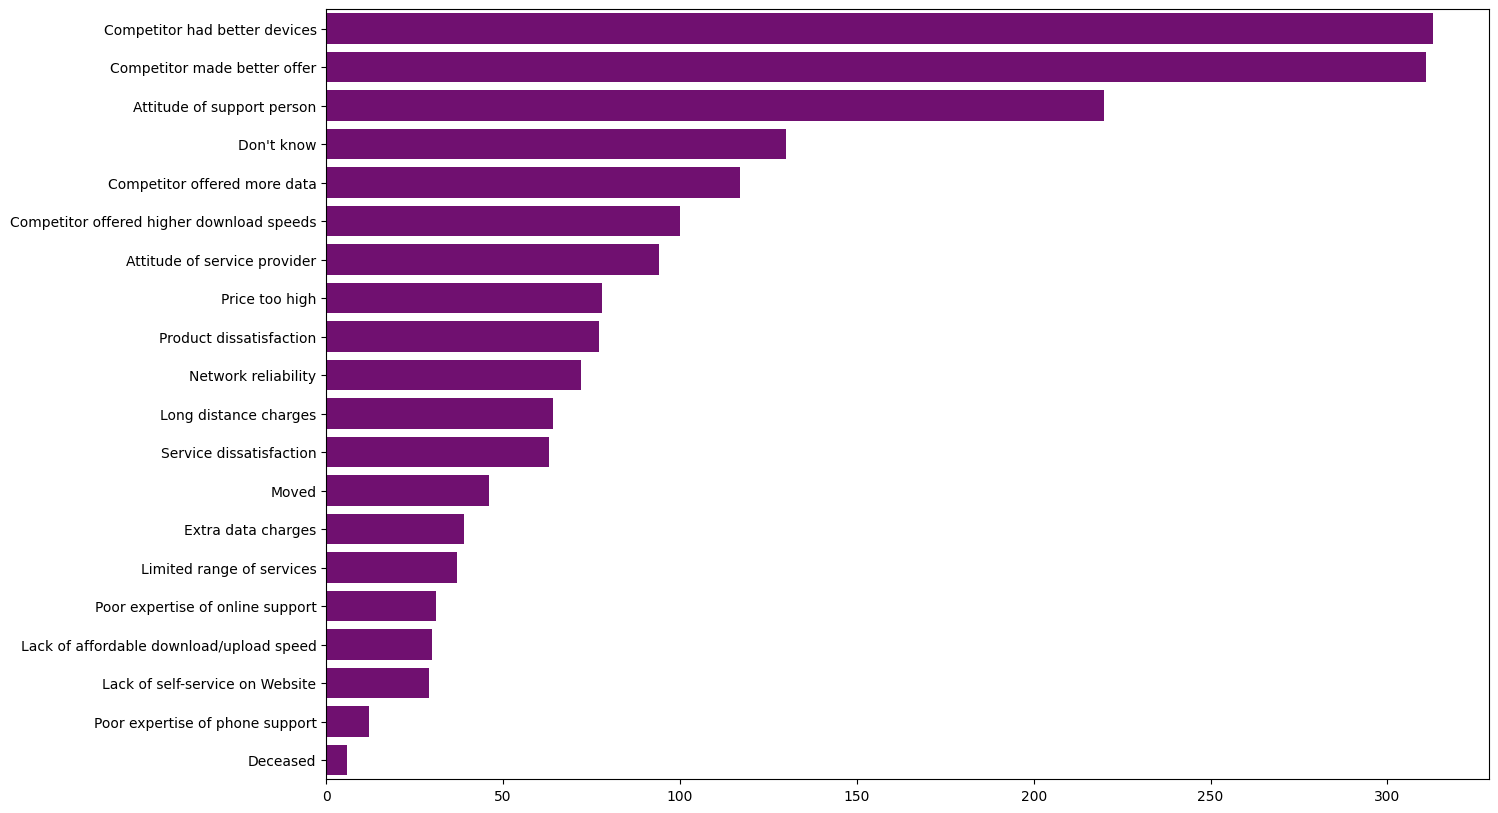

In [ ]:
fig = plt.figure(figsize = (15, 10))
ax = sns.countplot(data = dfc, y = dfc['churn_reason'], order = dfc['churn_reason'].value_counts().index, color = 'purple')
ax.set(xlabel = None, ylabel = None)

5. Model Selection and Training
- Choose an appropriate machine learning algorithm for costumer churn prediction.
- Train the selected model on the training data while avoiding overfitting through cross-validation techniques.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=5)

NameError: ignored